In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.chdir("/content/drive/Shareddrives/yelp_datasets")

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
covid = pd.read_csv('/content/covid.csv')
precovid = pd.read_csv('/content/precovid.csv')

In [ ]:
covid.head()

In [ ]:
food = []
f = open("/content/food.txt","r")
lines = f.readlines()
for line in lines :
  line=line.strip('\n')
  food.append(line)
f.close()

service = []
f = open("/content/service.txt","r")
lines = f.readlines()
for line in lines :
  line=line.strip('\n')
  service.append(line)
f.close()

In [ ]:
cotext = covid.text.str.split(expand=True).stack().value_counts().reset_index()
precotext = precovid.text.str.split(expand=True).stack().value_counts().reset_index()
 
cotext.columns = ['Word', 'Frequency'] 
precotext.columns = ['Word', 'Frequency'] 

In [ ]:
ffreq_covid = cotext[cotext['Word'].isin(food)]
sfreq_covid = cotext[cotext['Word'].isin(service)]

In [ ]:
ffreq_precovid = precotext[precotext['Word'].isin(food)]
sfreq_precovid = precotext[precotext['Word'].isin(service)]

In [ ]:
ffreq_covid.to_csv('ffreq_covid.csv',index=False)
ffreq_precovid.to_csv('ffreq_precovid.csv',index=False)

sfreq_covid.to_csv('sfreq_covid.csv',index=False)
sfreq_precovid.to_csv('sfreq_precovid.csv',index=False)

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

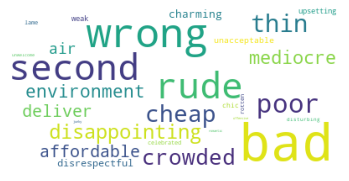

In [ ]:
def DrawWordcloud(read_name):
    wc = WordCloud(max_words = 50,background_color='white')
    fp = pd.read_csv(read_name)
    fp = pd.read_csv(read_name)
    name = list(fp.Word)#词
    value = (fp.Frequency - fp.Frequency.min())/(fp.Frequency.max()-fp.Frequency.min())
    for i in range(len(name)):
      name[i] = str(name[i])
    dic = dict(zip(name, value))
    wc.generate_from_frequencies(dic)
    plt.imshow(wc)
    plt.axis("off")
    plt.show()
    wc.to_file('Wordcloud_food.png')
if __name__=='__main__':
    DrawWordcloud("sfreq.csv")